# Training

In [ ]:
import gym
import gym_anytrading
import pandas as pd

from stable_baselines3 import DQN
from stable_baselines3 import A2C
from stable_baselines3.common.vec_env import DummyVecEnv
import os

# DIR_PATH = os.path.dirname(os.path.realpath(__file__))

In [ ]:
df = pd.read_csv("data/TATASTEEL.csv")
train_env = gym.make('stocks-v0',
                     df=df,
                     window_size=10,
                     frame_bound=(10, 300))

model = DQN('MlpPolicy', train_env, verbose=1, tensorboard_log=DIR_PATH+"/logs")

for ep in range(99):
    model.learn(total_timesteps=1000, tb_log_name="DQN_1", reset_num_timesteps=False)
    model.save(DIR_PATH + "/models/DQN_1")

# Random Agent

### Importing Packages

In [ ]:
import gym
import gym_anytrading
import pandas as pd
from stable_baselines3 import A2C
from stable_baselines3 import PPO
from stable_baselines3 import DQN

### Creating Environment

In [ ]:
test_env = gym.make('stocks-v0',
                    df=df,
                    window_size=0,
                    frame_bound=(3600, 3700))


obs = test_env.reset()
print(test_env.max_possible_profit())

### Evaluating the agent

In [ ]:
while True:
    action = test_env.action_space.sample()
    obs, rewards, done, info = test_env.step(action)
    if done:
        test_env.render_all()
        break

# Testing

### Importing packages

In [60]:
import gym
import gym_anytrading
import pandas as pd
from stable_baselines3 import A2C
from stable_baselines3 import PPO
from stable_baselines3 import DQN
import plotly.graph_objects as go

### Pandas Dataframe

In [61]:
df = pd.read_csv("data/TATASTEEL.csv", index_col="Date", parse_dates=True)
df.head(-1)

,Open,High,Low,Close,Volume
Date,,,,,
2005-10-17,380.00,386.30,374.60,384.35,4618966
2005-10-18,386.85,388.55,364.10,374.85,3408087
2005-10-19,371.60,373.55,352.00,361.55,4549667
2005-10-20,365.30,371.85,351.50,358.60,4132203
2005-10-21,360.35,368.50,357.65,367.40,4355886
...,...,...,...,...,...
2020-11-20,526.00,541.70,521.00,532.90,26686000
2020-11-23,538.00,546.00,536.35,543.10,17025425
2020-11-24,547.95,550.45,541.40,548.30,13029126


### Visualize Data

In [62]:
# PLot candlestick chart
fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])
fig.show()

### Data Analysis

In [63]:
print("Number Of Days : ", len(df))
print("Mean of Close: ", df["Close"].mean())
print("Std of Close: ", df["Close"].std())
print("Min of Close: ", df["Close"].min())
print("Max of Close: ", df["Close"].max())

Number Of Days :  3749
Mean of Close:  469.857708722326
Std of Close:  148.96336048639856
Min of Close:  148.8
Max of Close:  988.9


### Creating Environment

In [64]:
test_env = gym.make('stocks-v0',
                    df=df,
                    window_size=20,
                    frame_bound=(3300, 3450))

model = PPO.load("models/PPO/PPO_demo_130k_steps", env=test_env, device="cpu")

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


c:\Users\katti\Desktop\Everything\Python-Projects\Tuts_And_Projects\.venv\lib\site-packages\gym\utils\passive_env_checker.py:31: UserWarning:

WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (20, 2)

c:\Users\katti\Desktop\Everything\Python-Projects\Tuts_And_Projects\.venv\lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning:

You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.



### Evaluating the agent

c:\Users\katti\Desktop\Everything\Python-Projects\Tuts_And_Projects\.venv\lib\site-packages\gym\utils\passive_env_checker.py:174: UserWarning:

WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.

c:\Users\katti\Desktop\Everything\Python-Projects\Tuts_And_Projects\.venv\lib\site-packages\gym\utils\passive_env_checker.py:187: UserWarning:

WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.

c:\Users\katti\Desktop\Everything\Python-Projects\Tuts_And_Projects\.venv\lib\site-packages\gym\utils\passive_env_checker.py:195: UserWarning:

WARN: The result returned by `env.reset()` was not a tuple of the form `(obs, info)`, where `obs` is a observation and `info` is a dictionary containing additional information. Actual type: `<class 'numpy.ndarray'>`

c:\Users\katti\Desktop\Everyth

3.638975091513922


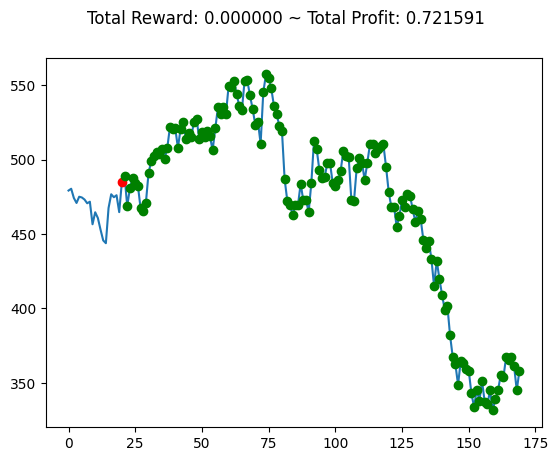

In [65]:
obs = test_env.reset()
print(test_env.max_possible_profit())
# test_env.render_all()
while True:
    action, _ = model.predict(obs, deterministic=True)
    obs, rewards, done, info = test_env.step(1-action)
    if done:
        test_env.render_all()
        break